# Modelling

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import pickle

import warnings
warnings.filterwarnings('ignore')  #Suppressing Warnings

# Setting the pandas to view all the avialble column
pd.set_option('display.max_columns',None)

In [2]:
df = pd.read_csv("dataset/processed_data.csv")
df

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingMovies_No internet service,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,1,29.85,29.85,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
1,34,56.95,1889.50,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,2,53.85,108.15,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,1
3,45,42.30,1840.75,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4,2,70.70,151.65,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,1990.50,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0
7039,72,103.20,7362.90,0,1,1,1,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0
7040,11,29.60,346.45,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0
7041,4,74.40,306.60,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1


In [3]:
Y = df['Churn']
X = df.drop(columns=['Churn'],axis=1)

In [4]:
from sklearn.model_selection import train_test_split

## Without Standerdization

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,shuffle=True,random_state=29)

In [6]:
# X_test.reset_index().to_csv("dataset/validation/x_test.csv",index=False)
# y_test.reset_index().to_csv("dataset/validation/y_test.csv",index=False)

# X_train.reset_index().to_csv("dataset/validation/x_train.csv",index=False)
# y_train.reset_index().to_csv("dataset/validation/y_train.csv",index=False)


# X_test_scaled.reset_index().to_csv("dataset/validation/x_test_scaled.csv",index=False)
# y_test_scaled.reset_index().to_csv("dataset/validation/y_test_scaled.csv",index=False)

# X_train_scaled.reset_index().to_csv("dataset/validation/x_train_scaled.csv",index=False)
# y_train_scaled.reset_index().to_csv("dataset/validation/y_train_scaled.csv",index=False)

## With Standerdized

### Standerdization

In [7]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [8]:
X_train_scaled,X_test_scaled,y_train_scaled,y_test_scaled = train_test_split(X_scaled,Y,test_size=0.2,shuffle=True,random_state=29)

## Algorothim Selection

List of Algorithm, We gonna test our data 
1. DecisionTree 
2. Logistic Regression
3. RandomForest
4. GradientBoosting
5. XGB Classifier
5. StackcingClassifier

## 1. DecisionTree Classifier

In [9]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(random_state=0)

In [10]:
from sklearn.model_selection import GridSearchCV
param_dist = {'criterion': ['gini','entropy'],'max_depth': [3, 5, 6, 7], 'min_samples_split': [50, 100, 150, 200, 250],'min_samples_leaf': [10,15,20,30,45] }
tree_grid = GridSearchCV(dtree, cv = 10, param_grid=param_dist,n_jobs = 3,verbose=1)
tree_grid.fit(X_train,y_train) 
print('Best Parameters using grid search: \n', tree_grid.best_params_)
print("Best Score", tree_grid.best_score_)



Fitting 10 folds for each of 200 candidates, totalling 2000 fits
Best Parameters using grid search: 
 {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 45, 'min_samples_split': 50}
Best Score 0.7973048385674515


In [11]:
tree_grid.best_score_

0.7973048385674515

In [12]:
dtree = tree_grid.best_estimator_
# dtree=DecisionTreeClassifier(criterion=tree_grid.best_params_['criterion'],random_state=0,max_depth=tree_grid.best_params_['max_depth'],min_samples_split=tree_grid.best_params_['min_samples_split'],min_samples_leaf=tree_grid.best_params_['min_samples_leaf'])
dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=45,
                       min_samples_split=50, random_state=0)

### Plotting Tree

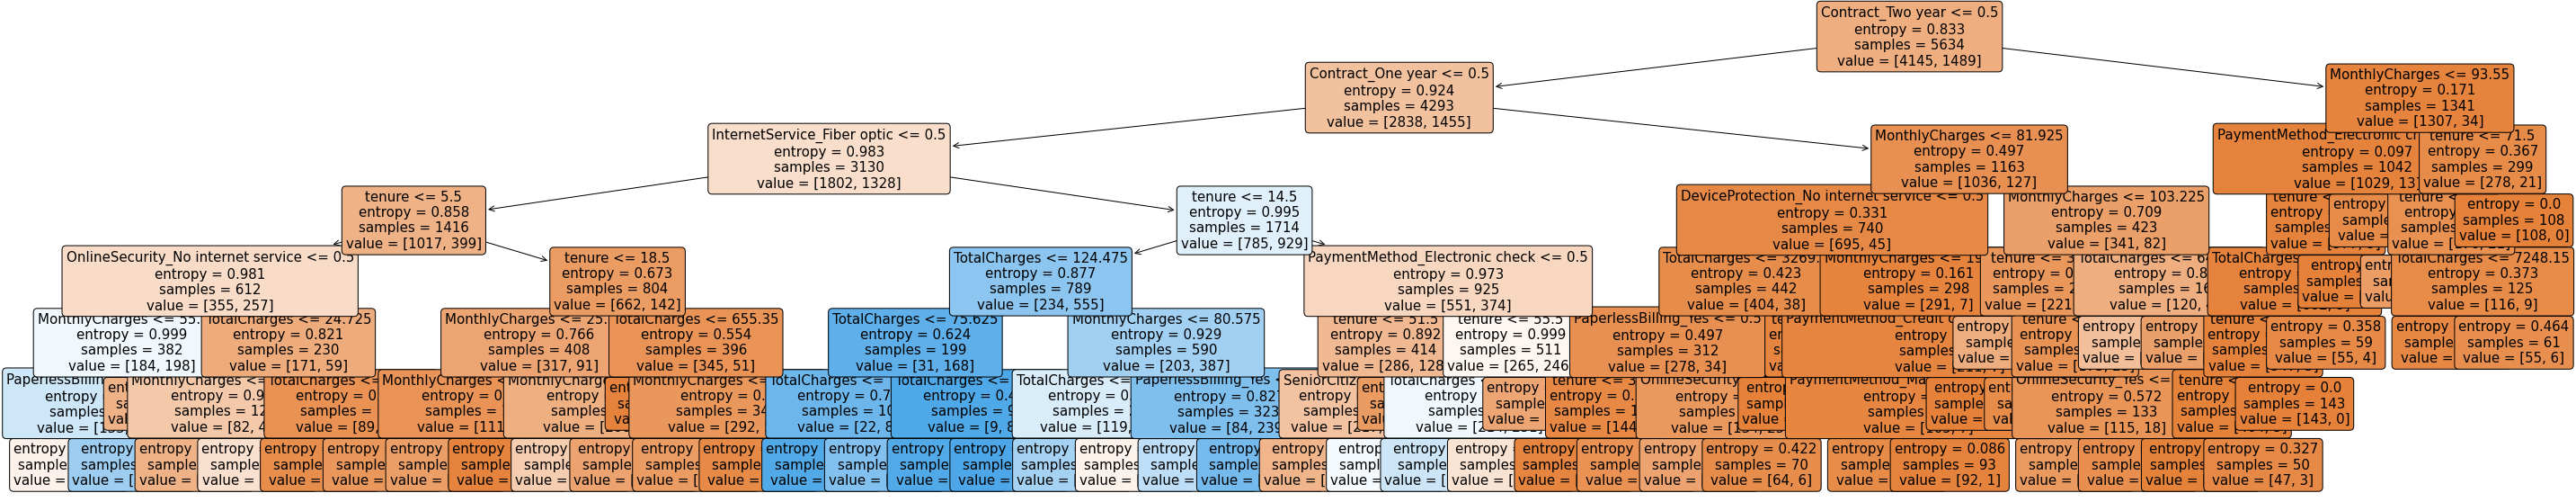

In [14]:
from sklearn import tree
import pydotplus
import matplotlib.pyplot as plt
plt.figure(figsize=[50,10])
tree.plot_tree(dtree,filled=True,fontsize=15,rounded=True,feature_names=X.columns)
plt.show()

In [15]:
# pickle.dump(dtree, open('models/decision_tree.sav', 'wb'))

In [16]:
# loaded_model = pickle.load(open('models/decision_tree.sav', 'rb'))

## 2. Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression(random_state=0)
logreg.fit(X_train_scaled,y_train_scaled)

LogisticRegression(random_state=0)

In [18]:
coeff_df=pd.DataFrame(X.columns)
coeff_df.columns=['features']
coeff_df["Coefficient Estimate"] = pd.Series(logreg.coef_[0])
coeff_df

,features,Coefficient Estimate
0,tenure,-1.346851
1,MonthlyCharges,0.102212
2,TotalCharges,0.655080
3,SeniorCitizen,0.102577
4,Partner_Yes,-0.007944
5,Dependents_Yes,-0.061098
6,InternetService_Fiber optic,0.263210
7,InternetService_No,-0.057465
8,OnlineSecurity_No internet service,-0.057465
9,OnlineSecurity_Yes,-0.214381


## 3. RandomForest Classifier

In [19]:
# Building a Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=0)
# rf.fit(X_train,y_train)

In [20]:
from sklearn.model_selection import GridSearchCV

param_dist = {'bootstrap': [True,False], 'criterion': ['gini','entropy'],'max_depth': [3, 5, 6, 7,10,15], 'min_samples_split': [50, 100, 150, 200, 250, 500],'min_samples_leaf': [10,15,20,30,45,60] }

tree_grid = GridSearchCV(rf, cv = 10, param_grid=param_dist,n_jobs = 3,verbose=1)
tree_grid.fit(X_train,y_train) 

print('Best Parameters using grid search: \n', tree_grid.best_params_)
print("Best Score", tree_grid.best_score_)

Fitting 10 folds for each of 864 candidates, totalling 8640 fits


KeyboardInterrupt: 

In [ ]:
rf=RandomForestClassifier(bootstrap=tree_grid.best_params_['bootstrap'], criterion=tree_grid.best_params_['criterion'],random_state=0,max_depth=tree_grid.best_params_['max_depth'],min_samples_split=tree_grid.best_params_['min_samples_split'],min_samples_leaf=tree_grid.best_params_['min_samples_leaf'])
rf.fit(X_train,y_train)

In [ ]:
def feature_importance(fitted_model=None,dataFrame=None,return_top_x=None,display=True):
    """
    Purpose
    ----------
    Prints dependent variable names ordered from largest to smallest
    based on information gain for CART model.
    Parameters
    ----------
    * return_top_x(int): Array of Features till top X which are contributing more 
    * dataframe: Dataframe required to calculated columns : This dataframe only used for training
    * fitted_model: Trained Model required

    Returns
    ----------
    Return top X feature if parameter passed
    """
    import plotly.express as px
    
    if fitted_model is None or dataFrame is None:
        raise EOFError("Failed to Load model or Root DataFrame")
    ranking = pd.DataFrame(
        {
            'features':dataFrame.columns[:-1].to_list(),
            "importance":fitted_model.feature_importances_}).sort_values('importance',ascending=True).reset_index(drop=True)
    if display:
        fig = px.bar(ranking, y='features', x='importance', text='importance',orientation='h',title="Feature Importance Table",)
        fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
        fig.update_layout(uniformtext_minsize=10, uniformtext_mode='hide')
        fig.show()
    if return_top_x is not None and return_top_x <= len(ranking['features'].to_list()):
        return ranking['features'].to_list()[:return_top_x]

In [ ]:
feature_importance(fitted_model=rf,dataFrame=df)

In [ ]:
  import pandas as pd
feature_importances=pd.DataFrame(rf.feature_importances_,
                                 index=X_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances

## 4. GradientBoostingTree

In [ ]:
# Building a Gradient Boosting Model
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier(criterion='mse',random_state=0)


In [ ]:
from sklearn.model_selecmaxn import GridSearchCV

# param_dist = {'learning_rate': [0.001, 0.01, 0.1], 'loss': ['deviance', 'exponential'],'max_depth': [3, 5, 6, 7,10,15], 'min_samples_split': [50, 100, 150, 200, 250, 500],'min_samples_leaf': [10,15,20,30,45,60] }
param_dist = {'learning_rate': [ 0.1], 'loss': ['deviance'],'max_depth': [3, 5, 6, 7,10], 'min_samples_split': [50, 100, 150, 200, 250, 500],'min_samples_leaf': [20,30,45,60] }

tree_grid = GridSearchCV(gbm, cv = 10, param_grid=param_dist,n_jobs = 3,verbose=1)
tree_grid.fit(X_train,y_train) 

print('Best Parameters using grid search: \n', tree_grid.best_params_)
print("Best Score", tree_grid.best_score_)

In [ ]:
gbm=GradientBoostingClassifier(
    criterion='mse',
    learning_rate=tree_grid.best_params_['learning_rate'],
    random_state=0,
    loss=tree_grid.best_params_['loss'],
    max_depth=tree_grid.best_params_['max_depth'],
    min_samples_split=tree_grid.best_params_['min_samples_split'],
    min_samples_leaf=tree_grid.best_params_['min_samples_leaf'])
gbm.fit(X_train,y_train)

## 5.  XGB Classifier

In [ ]:
import xgboost as xgb

xgb = xgb.XGBClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}

tree_grid = GridSearchCV(xgb, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")
tree_grid.fit(X_train,y_train) 

print('Best Parameters using grid search: \n', tree_grid.best_params_)
print("Best Score", tree_grid.best_score_)

In [ ]:
xgb = xgb.XGBClassifier(
    max_depth=tree_grid.best_params_['max_depth'], 
    learning_rate=tree_grid.best_params_['learning_rate'],
    gamma=tree_grid.best_params_['gamma'],
    reg_lambda=tree_grid.best_params_['reg_lambda'],
    scale_pos_weight=tree_grid.best_params_['scale_pos_weight'],
    subsample=tree_grid.best_params_['subsample'],
    colsample_bytree=tree_grid.best_params_['colsample_bytree'])

xgb.fit()